In [60]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import yfinance as yf

# Step 1: Load NIFTY 50 data (last 5 years)
data = yf.download("^NSEI", start="2020-01-01", end="2025-10-30")
print(data.head())

# Step 2: Use closing price
close_prices = data['Close'].values.reshape(-1, 1)

# Step 3: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Step 4: Prepare training data
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 5: Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 6: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)


/tmp/ipython-input-2211757506.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("^NSEI", start="2020-01-01", end="2025-10-30")
[*********************100%***********************]  1 of 1 completed

Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2020-01-01  12182.500000  12222.200195  12165.299805  12202.150391  304100
2020-01-02  12282.200195  12289.900391  12195.250000  12198.549805  407700
2020-01-03  12226.650391  12265.599609  12191.349609  12261.099609  428800
2020-01-06  11993.049805  12179.099609  11974.200195  12170.599609  396500
2020-01-07  12052.950195  12152.150391  12005.349609  12079.099609  447800
Epoch 1/20



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0816
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0017
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 3.8626e-04
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 3.2647e-04
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 3.1492e-04
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.6219e-04
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 3.3373e-04
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.4745e-04
Epoch 9/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.3455e-04
Epoch 10/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 3.1452e-04
Epoch 11/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 3.1994e-04
Epoch 12/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.4281e-04
Epoch 13/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.3293e-04
Epoch 14/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 3.2230e-04
Epoch 15/20
35/35 ━━━━━━━━━━━━━━━━

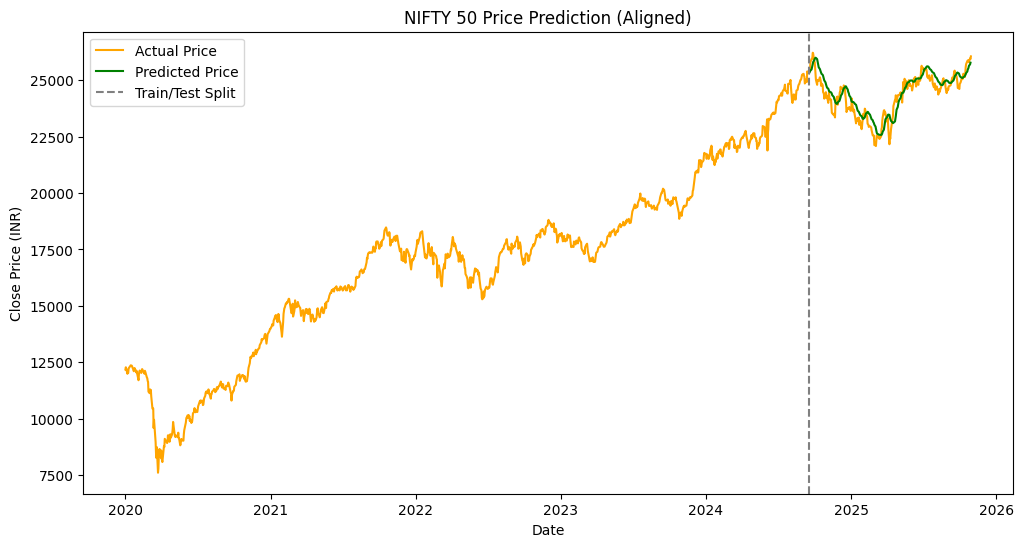

In [62]:
# Step 9 (fixed): Correct alignment and plotting
train = data[:train_size + time_step]
valid = data[train_size + time_step:].copy()
valid = valid[:len(predictions)]  # match lengths
valid.loc[:, 'Predictions'] = predictions  # assign safely

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='Actual Price', color='orange')
plt.plot(valid.index, valid['Predictions'], label='Predicted Price', color='green')
plt.axvline(x=train.index[-1], color='gray', linestyle='--', label='Train/Test Split')
plt.title('NIFTY 50 Price Prediction (Aligned)')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')
plt.legend()
plt.show()
